In [51]:
import numpy as np
import random
import pylab

$1.$ Implement in python the ridge regression with gradient descent. We will call this algorithm regression_gradient. Note that we now have parameters w and b we want to learn on the training set, as well an hyper-parameter to control the capacity of our model: $\lambda$. There are also hyper-parameters for the optimization: the step-size $\eta$, and potentially the number of steps.

In [52]:
class RidgeRegression:
    def __init__(self):
        self.data = []

    def regression_gradient(self, train_data, lam, eta, max_iter):
        #np.random.seed(10) # TODO REMOVE
        #self.theta = np.random.rand(train_data.shape[1]) # TODO REMOVE
    
        iteration = 0
        n = train_data.shape[0]
        d = train_data.shape[1]
        t = train_data[:, -1]
    
        self.theta = np.ones(d)
        #print(self.theta) # TODO REMOVE
    
        # Add a column of ones to the inputs.
        # The column will be multiplied by the bias
        x0 = np.ones(n)
        X0 = np.reshape(x0, (n, 1))
        X1 = train_data[:,:-1]
        X = np.c_[X0, X1]

        for i in range(max_iter):
            regularization = 2 * lam * self.theta
            f_of_x = np.dot(X, self.theta)
            gradient = 2 * np.dot((f_of_x - t),X)
            self.theta = self.theta - eta*(regularization + gradient)

        self.bias = self.theta[0]
        self.weight = self.theta[1:]
        return self.weight, self.bias

$2.$ Consider the function h(x) = sin(x) + 0.3x − 1. Draw a dataset $D_n$ of pairs (x, h(x)) with n = 15 points where x is drawn uniformly at random in the interval [−5, 5]. Make sure to use the same set $D_n$ for all the plots below.

In [53]:
def fsin(v1):
    return np.sin(v1)+0.3*(v1)-1

def fpre(v2, w, b):
    return w*v2+b

In [54]:
np.random.seed(10)
X_train = np.random.uniform(-5,5,15)
Y_train = fsin(X_train)

XX = np.linspace(-10, 10, 50)
YY = fsin(XX)

data = np.vstack((X_train, Y_train))
data_set = np.transpose(data)

$3.$ With $\lambda$ = 0, train your model on $D_n$ with the algorithm regression_gradient(). Then plot on the interval [−10, 10]: the points from the training set $D_n$, the curve h(x), and the curve of the function learned by your model using gradient descent. Make a clean legend. 
Remark: The solution you found with gradient descent should converge to the straight line that is closer from the n points (and also to the analytical solution). Be ready to adjust your step-size (small enough) and number of iterations (large enough) to reach this result.

$4.$ on the same graph, add the predictions you get for intermediate value of $\lambda$, and for a large value of $\lambda$. Your plot should include the value of $\lambda$ in the legend. It should illustrate qualitatively what happens when $\lambda$ increases.

[148.01787639543269, 40.201031910157347, 37.720449459338695, 38.215815670894749, 40.21364382236181]


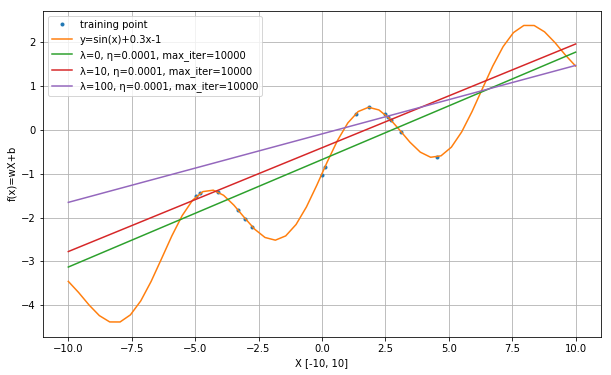

In [55]:
# regression_gradient(train_data, lam, eta, max_iter):
model = RidgeRegression()
w1, b1 = model.regression_gradient(data_set, 0, 0.001, 10)
w2, b2 = model.regression_gradient(data_set, 0, 0.0001, 1000)
w3, b3 = model.regression_gradient(data_set, 0, 0.0001, 10000)
w4, b4 = model.regression_gradient(data_set, 0, 0.000001, 150000)
w5, b5 = model.regression_gradient(data_set, 0, 0.000001, 100000)
# What do these numbers represent? -> [350.82144017111142, 82.047822709361668, 52.046680055674877, 52.04667952617298, 52.046680065815941]

y1 = fpre(XX,w1,b1)
y2 = fpre(XX,w2,b2)
y3 = fpre(XX,w3,b3)
y4 = fpre(XX,w4,b4)
y5 = fpre(XX,w5,b5)

# find combination that minimizes loss
losses = []
for y in (y1, y2, y3, y4, y5):
    losses.append(np.sum((y - YY)**2))
print(losses)

**We can see that after reaching a small-enough eta**
**& a large enough max_iter, the losses converge.**
**We will use y3 for our prediction**

In [ ]:
med_lambda = 10
w6, b6 = model.regression_gradient(data_set, 10, 0.0001, 10000)
large_lambda = 100
w7, b7 = model.regression_gradient(data_set, 100, 0.0001, 10000)

y6 = fpre(XX,w6,b6)
y7 = fpre(XX,w7,b7)

pylab.figure(figsize=(10,6))
pylab.plot(X_train, Y_train, '.')
pylab.plot(XX, YY, '-')
pylab.plot(XX, y3)
pylab.plot(XX, y6)
pylab.plot(XX, y7)
pylab.xlabel('X [-10, 10]')
pylab.ylabel('f(x)=wX+b')
pylab.grid()
pylab.legend(('training points', 'y=sin(x)+0.3x-1','λ=0, η=0.0001, max_iter=10000','λ=10, η=0.0001, max_iter=10000','λ=100, η=0.0001, max_iter=10000'))
pylab.show()

$5.$ Draw another dataset $D_{test}$ of 100 points by following the same procedure as $D_n$. Train your linear model on $D_n$ for $\lambda$ taking values in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. For each value of $\lambda$, measure the
average quadratic loss on $D_{test}$. Report these values on a graph with $\lambda$ on the x-axis and the loss value on the y-axis.

In [56]:
def floss(v3, w, b, t3):
    """Returns the mean quadratic loss"""
    loss_value = np.mean(((w*v3+b)-t3)**2)
    return loss_value

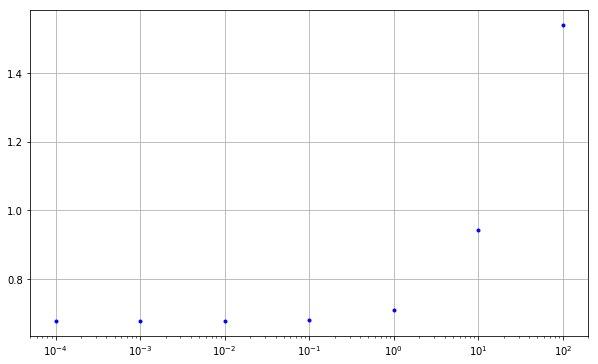

In [57]:
X_test = np.random.uniform(-5,5,100)
Y_test = fsin(X_test)

w7, b7 = model.regression_gradient(data_set, 0.0001, 0.001, 10000)
w8, b8 = model.regression_gradient(data_set, 0.001, 0.001, 10000)
w9, b9 = model.regression_gradient(data_set, 0.01, 0.001, 10000)
w10, b10 = model.regression_gradient(data_set, 0.1, 0.001, 10000)
w11, b11 = model.regression_gradient(data_set, 1, 0.001, 10000)
w12, b12 = model.regression_gradient(data_set, 10, 0.001, 10000)
w13, b13 = model.regression_gradient(data_set, 100, 0.001, 10000)

y7 = floss(X_test, w7, b7, Y_test)
y8 = floss(X_test, w8, b8, Y_test)
y9 = floss(X_test, w9, b9, Y_test)
y10 = floss(X_test, w10, b10, Y_test)
y11 = floss(X_test, w11, b11, Y_test)
y12 = floss(X_test, w12, b12, Y_test)
y13 = floss(X_test, w13, b13, Y_test)

plt.figure(figsize=(10,6))

lamb = (0.0001, 0.001, 0.01, 0.1, 1, 10, 100)
los = (y7, y8, y9, y10, y11, y12, y13)

plt.plot(lamb, los, '.', color = 'b' )
plt.xscale('log')
plt.grid()
plt.show()

$6.$ Use the technique studied in problem 1.3 above to learn a non-linear function of x. Specifically, use Ridge regression with the fixed preprocessing $\phi_{poly^l}$ described above to get a polynomial regression of order l. Apply this technique with $\lambda$ = 0.01 and different values of l. Plot a graph similar to question 2.2 with all the prediction functions you got. Don’t plot too many functions to keep it readable and precise the value of l in the legend.

In [58]:
def polynomial_normalized(XO, l):
    mu = np.zeros((1, l))
    xmin = np.zeros((1, l))
    xmax = np.zeros((1, l))
    XP = np.zeros((XO.shape[0], l))
    for i in range(0, l):
        XP[:,i] = XO**(i+1)
    mu = np.mean(XP, axis = 0)
    xmin = np.min(XP, axis = 0)
    xmax = np.max(XP, axis =0)

    XP_norm = (XP - mu)/(xmax - xmin)
    return XP_norm

def polynomial(XO, l):
    XP = np.zeros((XO.shape[0], l))
    for i in range(0, l):
        XP[:,i] = XO**(i+1)
    return XP

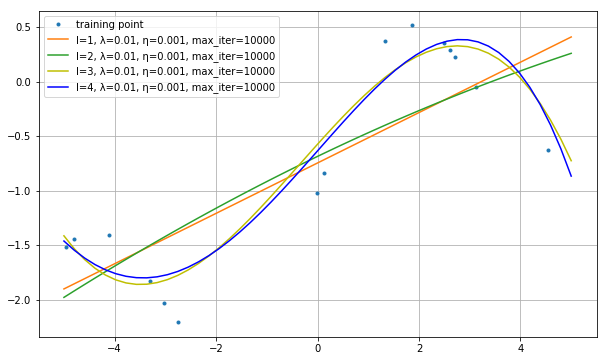

In [131]:
X_X = np.linspace(-5, 5, 50)
Xl1 = polynomial_normalized(X_train, 1)
XX1 = polynomial_normalized(X_X, 1)
X_poly1 = np.c_[Xl1, data_set[:,-1]]

Xl2 = polynomial_normalized(X_train, 2)
XX2 = polynomial_normalized(X_X, 2)
X_poly2 = np.c_[Xl2, data_set[:,-1]]

Xl3 = polynomial_normalized(X_train, 3)
XX3 = polynomial_normalized(X_X, 3)
X_poly3 = np.c_[Xl3, data_set[:,-1]]

Xl4 = polynomial_normalized(X_train, 4)
XX4 = polynomial_normalized(X_X, 4)
X_poly4 = np.c_[Xl4, data_set[:,-1]]

Xl5 = polynomial_normalized(X_train, 5)
XX5 = polynomial_normalized(X_X, 5)
X_poly5 = np.c_[Xl5, data_set[:,-1]]

ww1, bb1 = model.regression_gradient(X_poly1, 0.01, 0.01, 10000)
ww2, bb2 = model.regression_gradient(X_poly2, 0.01, 0.01, 10000)
ww3, bb3 = model.regression_gradient(X_poly3, 0.01, 0.005, 100000)
ww4, bb4 = model.regression_gradient(X_poly4, 0.01, 0.005, 100000)
#ww5, bb5 = model.regression_gradient(X_poly5, 0.01, 0.001, 100000)

z1 = np.dot(XX1,ww1)+bb1
z2 = np.dot(XX2,ww2)+bb2
z3 = np.dot(XX3,ww3)+bb3
z4 = np.dot(XX4,ww4)+bb4
#z5 = np.dot(XX5,ww5)+bb5

plt.figure(figsize=(10,6))
plt.plot(X_train, Y_train, '.')
#plt.plot(XX, YY, '-')
plt.plot(np.sort(X_X),z1[np.argsort(X_X)])
plt.plot(np.sort(X_X),z2[np.argsort(X_X)])
plt.plot(np.sort(X_X),z3[np.argsort(X_X)],color='y')
plt.plot(np.sort(X_X),z4[np.argsort(X_X)],color='b')
#plt.plot(np.sort(X_X),z5[np.argsort(X_X)],color='r')

plt.grid()
plt.legend(('training point', 'l=1, λ=0.01, η=0.001, max_iter=10000', 'l=2, λ=0.01, η=0.001, max_iter=10000',
            'l=3, λ=0.01, η=0.001, max_iter=10000','l=4, λ=0.01, η=0.001, max_iter=10000',
            'l=5, λ=0.01, η=0.001, max_iter=10000'))
plt.show()


$7.$ Comment on what happens when l increases. What happens to the empirical risk (loss on $D_n$), and to the true risk (loss on $D_{test}$)?

In [136]:
def floss_train(train_set, w, b, t):
    loss_value = (1/15)*(((np.sum((w*train_set), axis = 1)-t)+b)**2)
    return loss_value

def floss_test(test_set, w, b, t):
    loss_value = (1/100)*(((np.sum((w*test_set), axis = 1)-t)+b)**2)
    return loss_value

In [138]:
#print(Xl2)
#print(ww2, bb2)

tl1 = np.sum(floss_train(Xl1, ww1, bb1, Y_train))
tl2 = np.sum(floss_train(Xl2, ww2, bb2, Y_train))
tl3 = np.sum(floss_train(Xl3, ww3, bb3, Y_train))
tl4 = np.sum(floss_train(Xl4, ww4, bb4, Y_train))
tl5 = np.sum(floss_train(Xl5, ww5, bb5, Y_train))

lt = (1, 2, 3, 4, 5)
tl = (tl1, tl2, tl3, tl4, tl5)


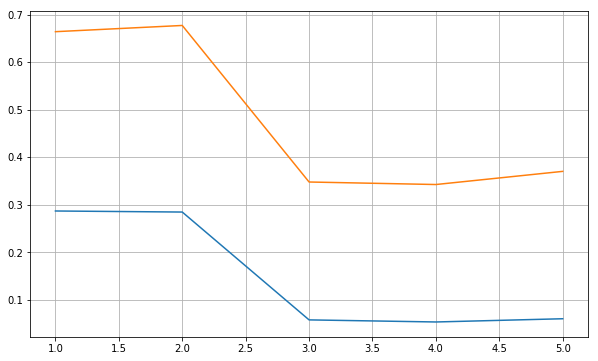

In [134]:
Xh1 = polynomial_normalized(X_test, 1)
Xh2 = polynomial_normalized(X_test, 2)
Xh3 = polynomial_normalized(X_test, 3)
Xh4 = polynomial_normalized(X_test, 4)
Xh5 = polynomial_normalized(X_test, 5)

th1 = np.sum(floss_test(Xh1, ww1, bb1, Y_test))
th2 = np.sum(floss_test(Xh2, ww2, bb2, Y_test))
th3 = np.sum(floss_test(Xh3, ww3, bb3, Y_test))
th4 = np.sum(floss_test(Xh4, ww4, bb4, Y_test))
th5 = np.sum(floss_test(Xh5, ww5, bb5, Y_test))

th = (th1, th2, th3, th4, th5)

plt.figure(figsize=(10,6))
plt.plot(lt, tl)
plt.plot(lt, th)
plt.grid()
plt.show()